In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np


In [2]:
#UserWarningler cikmasin diye
import warnings
warnings.filterwarnings("ignore")


In [3]:
iris = load_iris()
n_classes = len(iris.target_names)
plot_colors = "ryb"


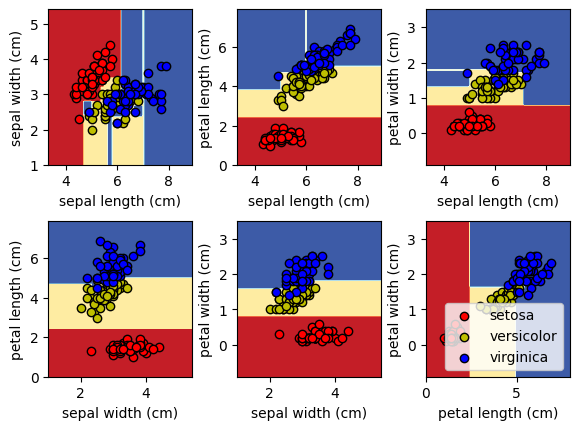

In [4]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    # Karar ağacı sınıflandırıcısını eğitin
    clf = DecisionTreeClassifier().fit(X, y)

    # Alt grafik (subplot) oluşturun
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    # Karar sınırlarını görselleştirin
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],  # Doğru özellik adları
        ylabel=iris.feature_names[pair[1]]
    )

    # Veri noktalarını görselleştirin
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                     cmap=plt.cm.RdYlBu,
                     edgecolors= "black")

plt.legend()
plt.show()